In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
from datetime import timedelta, datetime
from matplotlib import font_manager, rc
from matplotlib.ticker import MaxNLocator

from IPython.display import Image # 이미지 삽입

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = [25,15]
plt.rcParams['font.size'] = 25

# 경고메세지 끄기
warnings.filterwarnings(action='ignore')

In [3]:
# outliar 제거 함수 (IQR 설정)
def remove_out(*dataframes, remove_col) :
    for i, dataframe in enumerate(dataframes) :
        for k in remove_col :
            level_1q = dataframe[k].quantile(0.25)
            level_3q = dataframe[k].quantile(0.75)
            IQR = level_3q - level_1q
            rev_range = 10
            
            outliar_h = dataframe[k] >= level_3q + (rev_range * IQR)
            outliar_l = dataframe[k] <= level_1q - (rev_range * IQR)

            a=dataframe[outliar_h].index
            b=dataframe[outliar_l].index
            
            print(dataframe.name,":",[a,b],"\n")
            
            dataframe.drop(a, inplace=True)
            dataframe.drop(b, inplace=True)



In [27]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_01.01~01.15.csv')
arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data_2 = pd.read_csv('./OA200_1/OA2001_01.16~01.31.csv')
arim_data_2['reg_date'] = arim_data_2.reg_date.apply(pd.to_datetime)
# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_01.01~01.15.csv')
airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_2 = pd.read_csv('./AirKorea_상봉동/AirKorea_01.16~01.31.csv')
airKorea_data_2['date'] = airKorea_data_2.date.apply(pd.to_datetime)

arim_data = pd.concat([arim_data, arim_data_2])
airKorea_data = pd.concat([airKorea_data, airKorea_data_2])

# 이름 설정
arim_data.name = '진주성'
airKorea_data.name = '상봉동'

# outliar 제거
remove_out(arim_data, airKorea_data, remove_col=['pm25'])

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

# arim 데이터 풍향, 풍속 데이터 삽입
Sangbong = pd.read_csv("./weather/상봉동/2023-01.csv", encoding='cp949')
Sangbong['일시'] = Sangbong['일시'].apply(pd.to_datetime)
Sangbong_avg = Sangbong.groupby([pd.Grouper(key='일시', freq='H')]).mean()
arim_data_avg['wind_dir'] = Sangbong_avg['풍향(16방위)']
arim_data_avg['wind_speed'] = Sangbong_avg['풍속(m/s)']
airKorea_data_avg['temp'] = Sangbong_avg['기온']
airKorea_data_avg['humi'] = Sangbong_avg['상대습도(%)']
airKorea_data_avg['wind_dir'] = Sangbong_avg['풍향(16방위)']
airKorea_data_avg['wind_speed'] = Sangbong_avg['풍속(m/s)']

arim_data_avg.drop('2023-02-01', axis=0, inplace=True)
arim_data_avg.drop('no', axis=1, inplace=True)

# 일단 데이터 셋 확인
print('########################')
print("                                         OA200_2")
display(arim_data_avg)
print('########################')
print("                                         ariKorea")
display(airKorea_data_avg)

진주성 : [Int64Index([], dtype='int64'), Int64Index([], dtype='int64')] 

상봉동 : [Int64Index([], dtype='int64'), Int64Index([], dtype='int64')] 

########################
                                         OA200_2


,pm25,pm10,temp,humi,wind_dir,wind_speed
reg_date,,,,,,
2023-01-01 01:00:00,27.383333,27.520000,1.888333,53.793333,274.566667,0.458333
2023-01-01 02:00:00,28.838333,29.036667,1.238333,54.196667,279.583333,0.625000
2023-01-01 03:00:00,28.456667,28.645000,0.726667,54.510000,295.658333,0.491667
2023-01-01 04:00:00,27.603333,27.801667,0.311667,54.828333,237.691667,0.575000
2023-01-01 05:00:00,28.450000,28.635000,-0.071667,55.715000,313.650000,0.558333
...,...,...,...,...,...,...
2023-01-31 19:00:00,7.821667,7.821667,10.198333,43.755000,175.958333,1.583333
2023-01-31 20:00:00,9.698333,9.726667,8.205000,49.786667,158.816667,0.275000
2023-01-31 21:00:00,9.025000,9.040000,6.548333,54.526667,288.708333,0.641667


########################
                                         ariKorea


,pm10,pm25,temp,humi,wind_dir,wind_speed
date,,,,,,
2023-01-01 01:00:00,29.0,16.0,-2.175000,70.400000,274.566667,0.458333
2023-01-01 02:00:00,27.0,NaN,-2.883333,73.150000,279.583333,0.625000
2023-01-01 03:00:00,31.0,25.0,-3.308333,73.091667,295.658333,0.491667
2023-01-01 04:00:00,29.0,24.0,-3.883333,74.700000,237.691667,0.575000
2023-01-01 05:00:00,29.0,21.0,-4.283333,76.275000,313.650000,0.558333
...,...,...,...,...,...,...
2023-01-31 19:00:00,31.0,22.0,6.483333,58.691667,175.958333,1.583333
2023-01-31 20:00:00,33.0,22.0,5.158333,63.750000,158.816667,0.275000
2023-01-31 21:00:00,35.0,21.0,3.633333,69.508333,288.708333,0.641667


진주성 : [Int64Index([], dtype='int64'), Int64Index([], dtype='int64')] 

상봉동 : [Int64Index([], dtype='int64'), Int64Index([], dtype='int64')] 



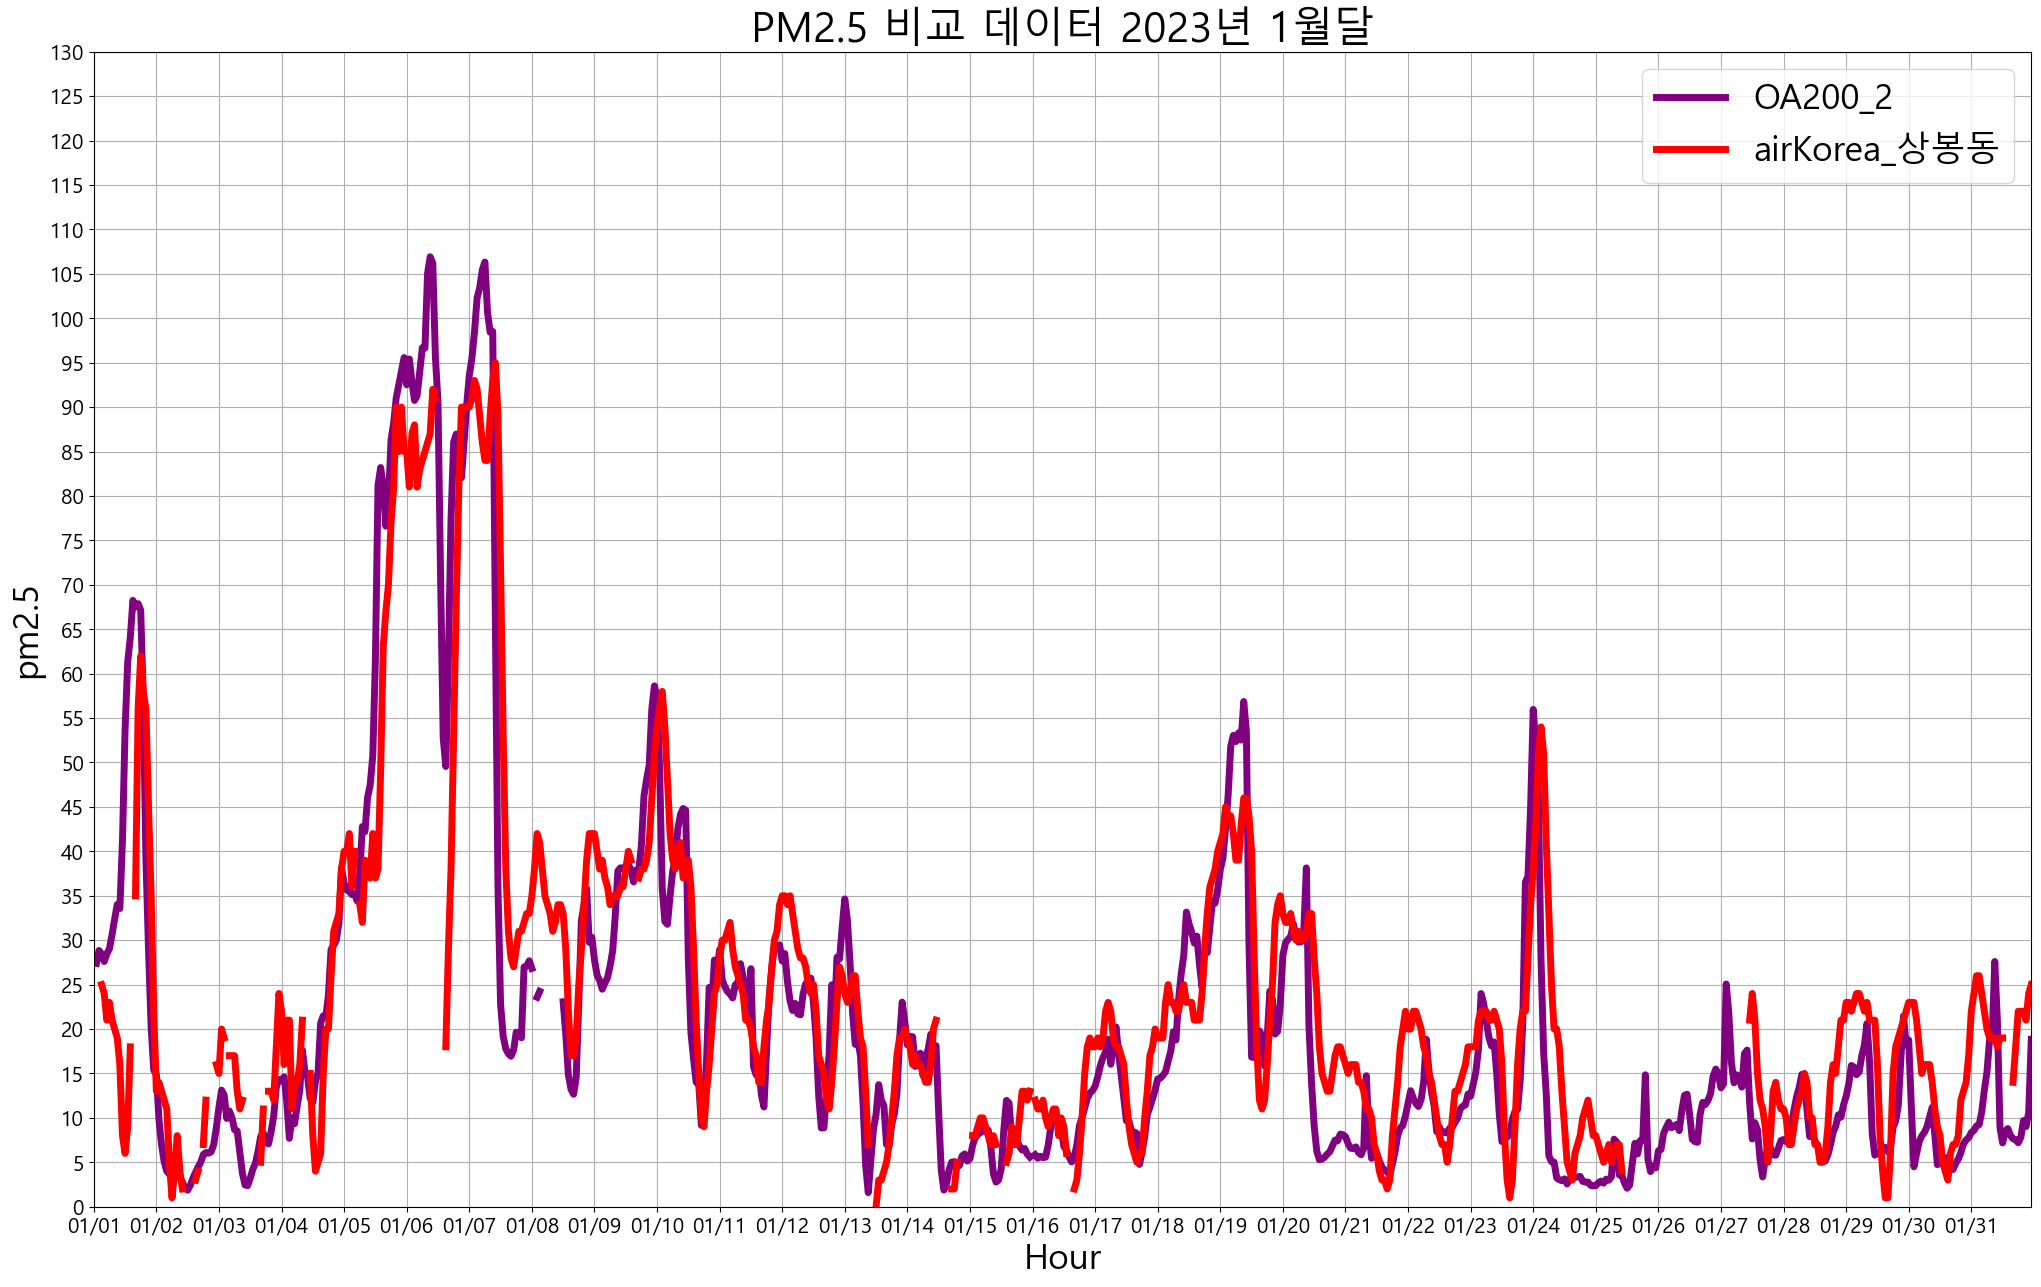

In [62]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_01.01~01.15.csv')
arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data_2 = pd.read_csv('./OA200_1/OA2001_01.16~01.31.csv')
arim_data_2['reg_date'] = arim_data_2.reg_date.apply(pd.to_datetime)
# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_01.01~01.15.csv')
airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_2 = pd.read_csv('./AirKorea_상봉동/AirKorea_01.16~01.31.csv')
airKorea_data_2['date'] = airKorea_data_2.date.apply(pd.to_datetime)

arim_data = pd.concat([arim_data, arim_data_2])
airKorea_data = pd.concat([airKorea_data, airKorea_data_2])

# 이름 설정
arim_data.name = '진주성'
airKorea_data.name = '상봉동'

# outliar 제거
remove_out(arim_data, airKorea_data, remove_col=['pm25'])

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

# arim 데이터 풍향, 풍속 데이터 삽입
Sangbong = pd.read_csv("./weather/상봉동/2023-01.csv", encoding='cp949')
Sangbong['일시'] = Sangbong['일시'].apply(pd.to_datetime)
Sangbong_avg = Sangbong.groupby([pd.Grouper(key='일시', freq='H')]).mean()
arim_data_avg['wind_dir'] = Sangbong_avg['풍향(16방위)']
arim_data_avg['wind_speed'] = Sangbong_avg['풍속(m/s)']
airKorea_data_avg['temp'] = Sangbong_avg['기온']
airKorea_data_avg['humi'] = Sangbong_avg['상대습도(%)']
airKorea_data_avg['wind_dir'] = Sangbong_avg['풍향(16방위)']
airKorea_data_avg['wind_speed'] = Sangbong_avg['풍속(m/s)']

arim_data_avg.drop('2023-02-01', axis=0, inplace=True)
arim_data_avg.drop('no', axis=1, inplace=True)

# 그래프 2개 비교
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=30))
plt.plot(arim_data_avg.index, arim_data_avg.pm25, color="purple", linewidth="5")
plt.plot(airKorea_data_avg.index, airKorea_data_avg.pm25, color="red", linewidth="5")
plt.xlabel('Hour')
plt.ylabel('pm2.5')
plt.legend(('OA200_2','airKorea_상봉동'))
plt.title('PM2.5 비교 데이터 2023년 1월달')
plt.xlim(pd.to_datetime('2023-01-01 00:00:00'), pd.to_datetime('2023-01-31 23:00:00'))
plt.ylim(0, 130)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.show()

진주성 : [Int64Index([], dtype='int64'), Int64Index([], dtype='int64')] 

상봉동 : [Int64Index([], dtype='int64'), Int64Index([], dtype='int64')] 



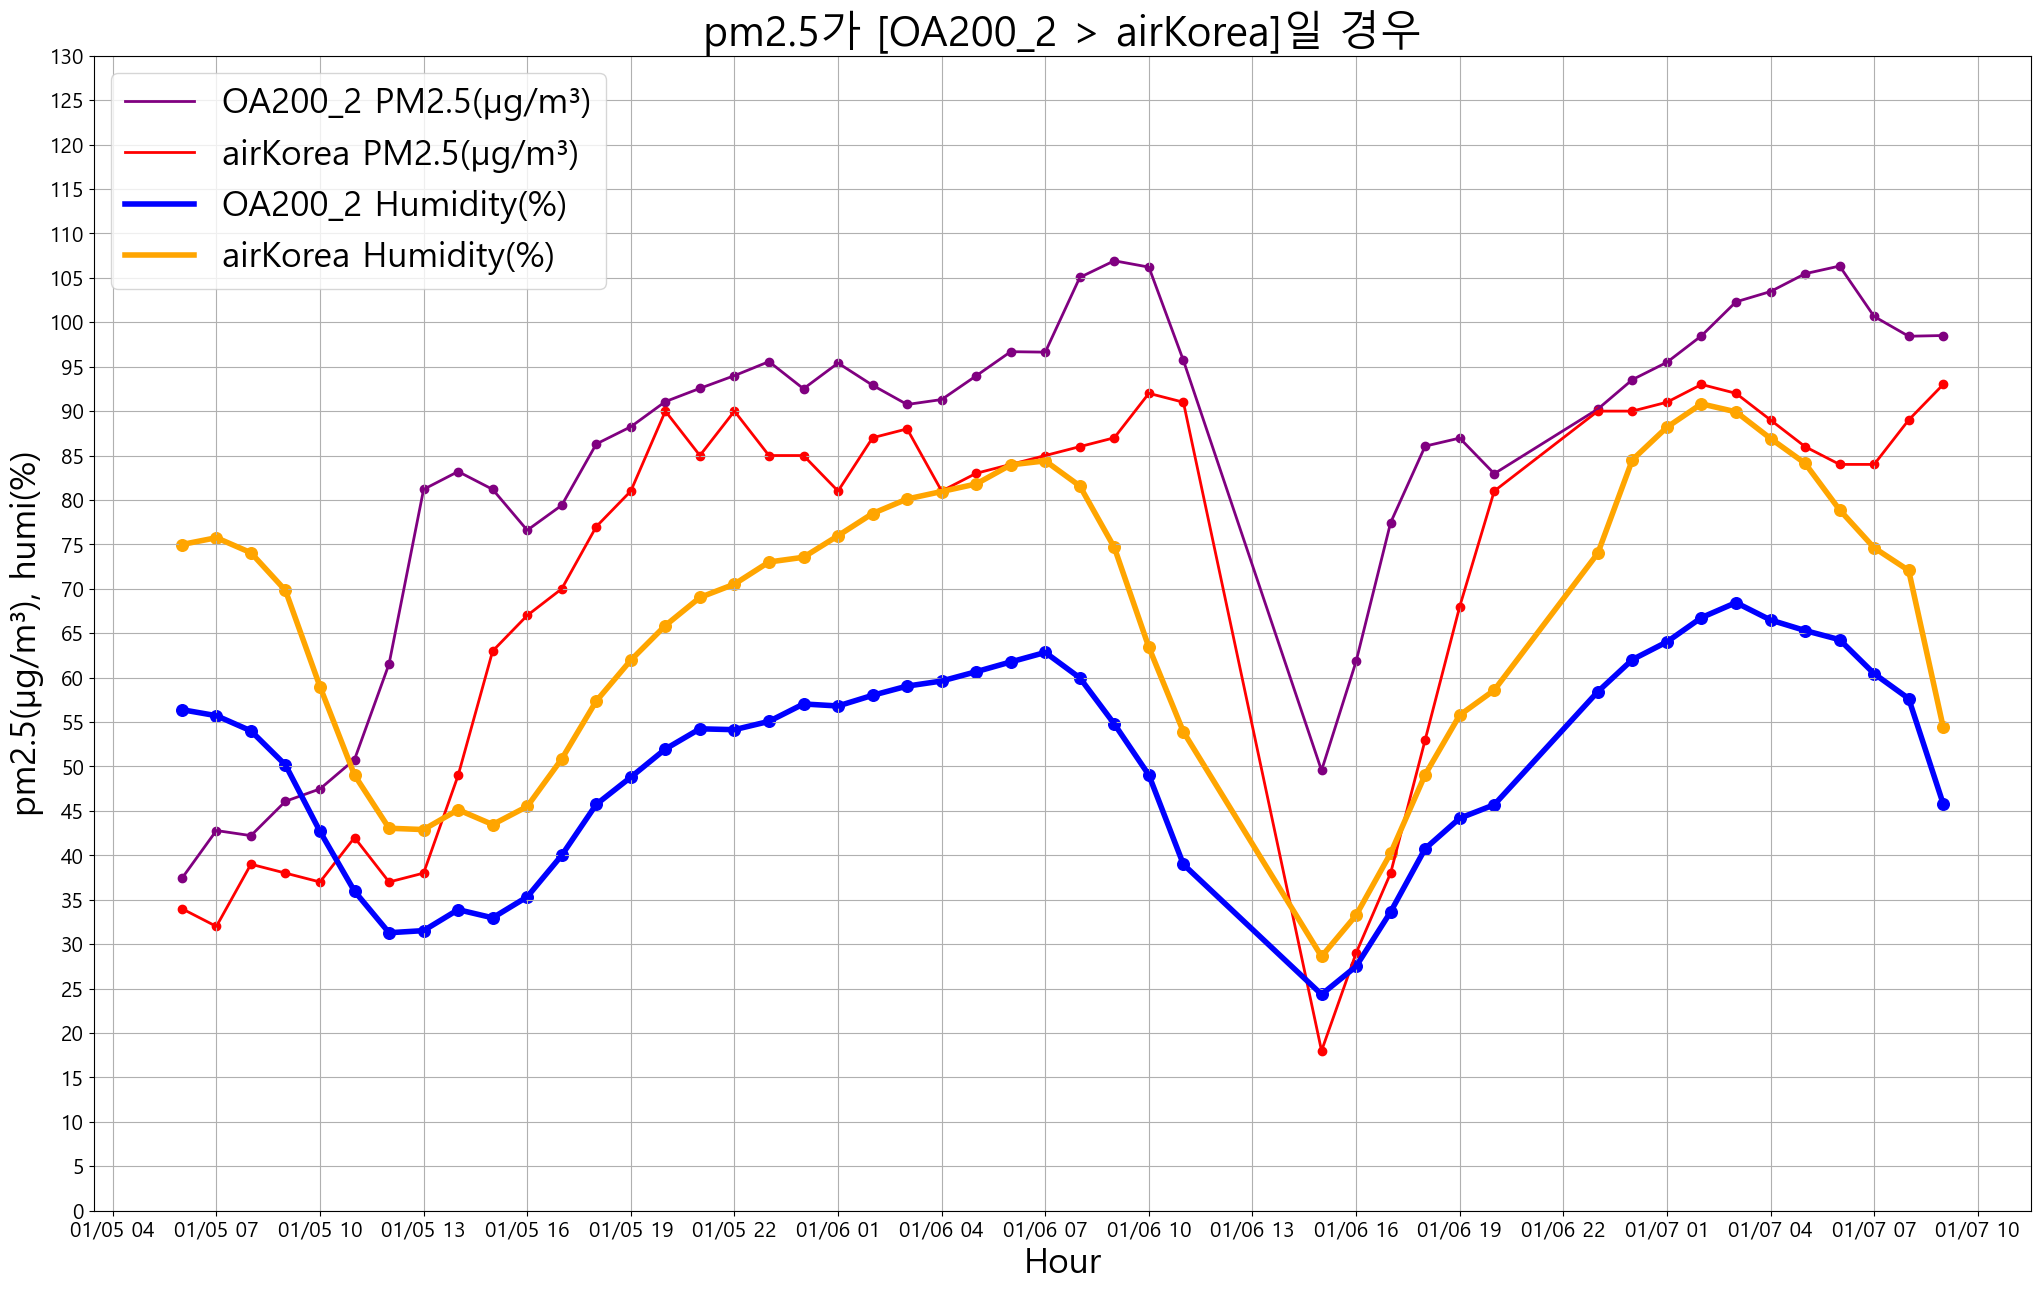

In [98]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_01.01~01.15.csv')
arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data_2 = pd.read_csv('./OA200_1/OA2001_01.16~01.31.csv')
arim_data_2['reg_date'] = arim_data_2.reg_date.apply(pd.to_datetime)
# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_01.01~01.15.csv')
airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_2 = pd.read_csv('./AirKorea_상봉동/AirKorea_01.16~01.31.csv')
airKorea_data_2['date'] = airKorea_data_2.date.apply(pd.to_datetime)

arim_data = pd.concat([arim_data, arim_data_2])
airKorea_data = pd.concat([airKorea_data, airKorea_data_2])

# 이름 설정
arim_data.name = '진주성'
airKorea_data.name = '상봉동'

# outliar 제거
remove_out(arim_data, airKorea_data, remove_col=['pm25'])

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

# arim 데이터 풍향, 풍속 데이터 삽입
Sangbong = pd.read_csv("./weather/상봉동/2023-01.csv", encoding='cp949')
Sangbong['일시'] = Sangbong['일시'].apply(pd.to_datetime)
Sangbong_avg = Sangbong.groupby([pd.Grouper(key='일시', freq='H')]).mean()
arim_data_avg['wind_dir'] = Sangbong_avg['풍향(16방위)']
arim_data_avg['wind_speed'] = Sangbong_avg['풍속(m/s)']
airKorea_data_avg['temp'] = Sangbong_avg['기온']
airKorea_data_avg['humi'] = Sangbong_avg['상대습도(%)']
airKorea_data_avg['wind_dir'] = Sangbong_avg['풍향(16방위)']
airKorea_data_avg['wind_speed'] = Sangbong_avg['풍속(m/s)']

arim_data_avg.drop('2023-02-01', axis=0, inplace=True)
arim_data_avg.drop('no', axis=1, inplace=True)

arim_data_avg = arim_data_avg.loc['2023-01-05 01:00:00':'2023-01-08 00:00:00']
airKorea_data_avg = airKorea_data_avg.loc['2023-01-05 01:00:00':'2023-01-08 00:00:00']

airKorea_data_avg.dropna(subset=['pm25'], axis=0)

idx = set(airKorea_data_avg.index).intersection(
    set(arim_data_avg.index)
)
airKorea_data_avg = airKorea_data_avg.reindex(idx)
arim_data_avg = arim_data_avg.reindex(idx)

diff = np.subtract(arim_data_avg.pm25, airKorea_data_avg.pm25)
diff = diff.to_frame(name='difference')
arimUp = arim_data_avg.loc[diff.loc[diff['difference']>0].index]
airKorea = airKorea_data_avg.loc[diff.loc[diff['difference']>0].index]
arimUp.sort_index(inplace=True)
airKorea.sort_index(inplace=True)

plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H'))
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=30))
plt.plot(arimUp.index, arimUp.pm25, color='purple', linewidth=2, label='OA200_2 PM2.5(µg/m³)')
plt.plot(airKorea.index, airKorea.pm25, color='red', linewidth=2, label='airKorea PM2.5(µg/m³)')
plt.plot(arimUp.index, arimUp.humi, color='blue', linewidth=4, label='OA200_2 Humidity(%)')
plt.plot(airKorea.index, airKorea.humi, color='orange', linewidth=4, label='airKorea Humidity(%)')
plt.scatter(arimUp.index, arimUp.pm25, color='purple')
plt.scatter(arimUp.index, arimUp.humi, color='blue', s=70)
plt.scatter(airKorea.index, airKorea.pm25, color='red')
plt.scatter(airKorea.index, airKorea.humi, color='orange', s=70)

plt.xlabel('Hour')
plt.ylabel('pm2.5(µg/m³), humi(%)')
plt.legend()
plt.title('pm2.5가 [OA200_2 > airKorea]일 경우')
plt.ylim(0,130)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.show()

진주성 : [Int64Index([], dtype='int64'), Int64Index([], dtype='int64')] 

상봉동 : [Int64Index([], dtype='int64'), Int64Index([], dtype='int64')] 



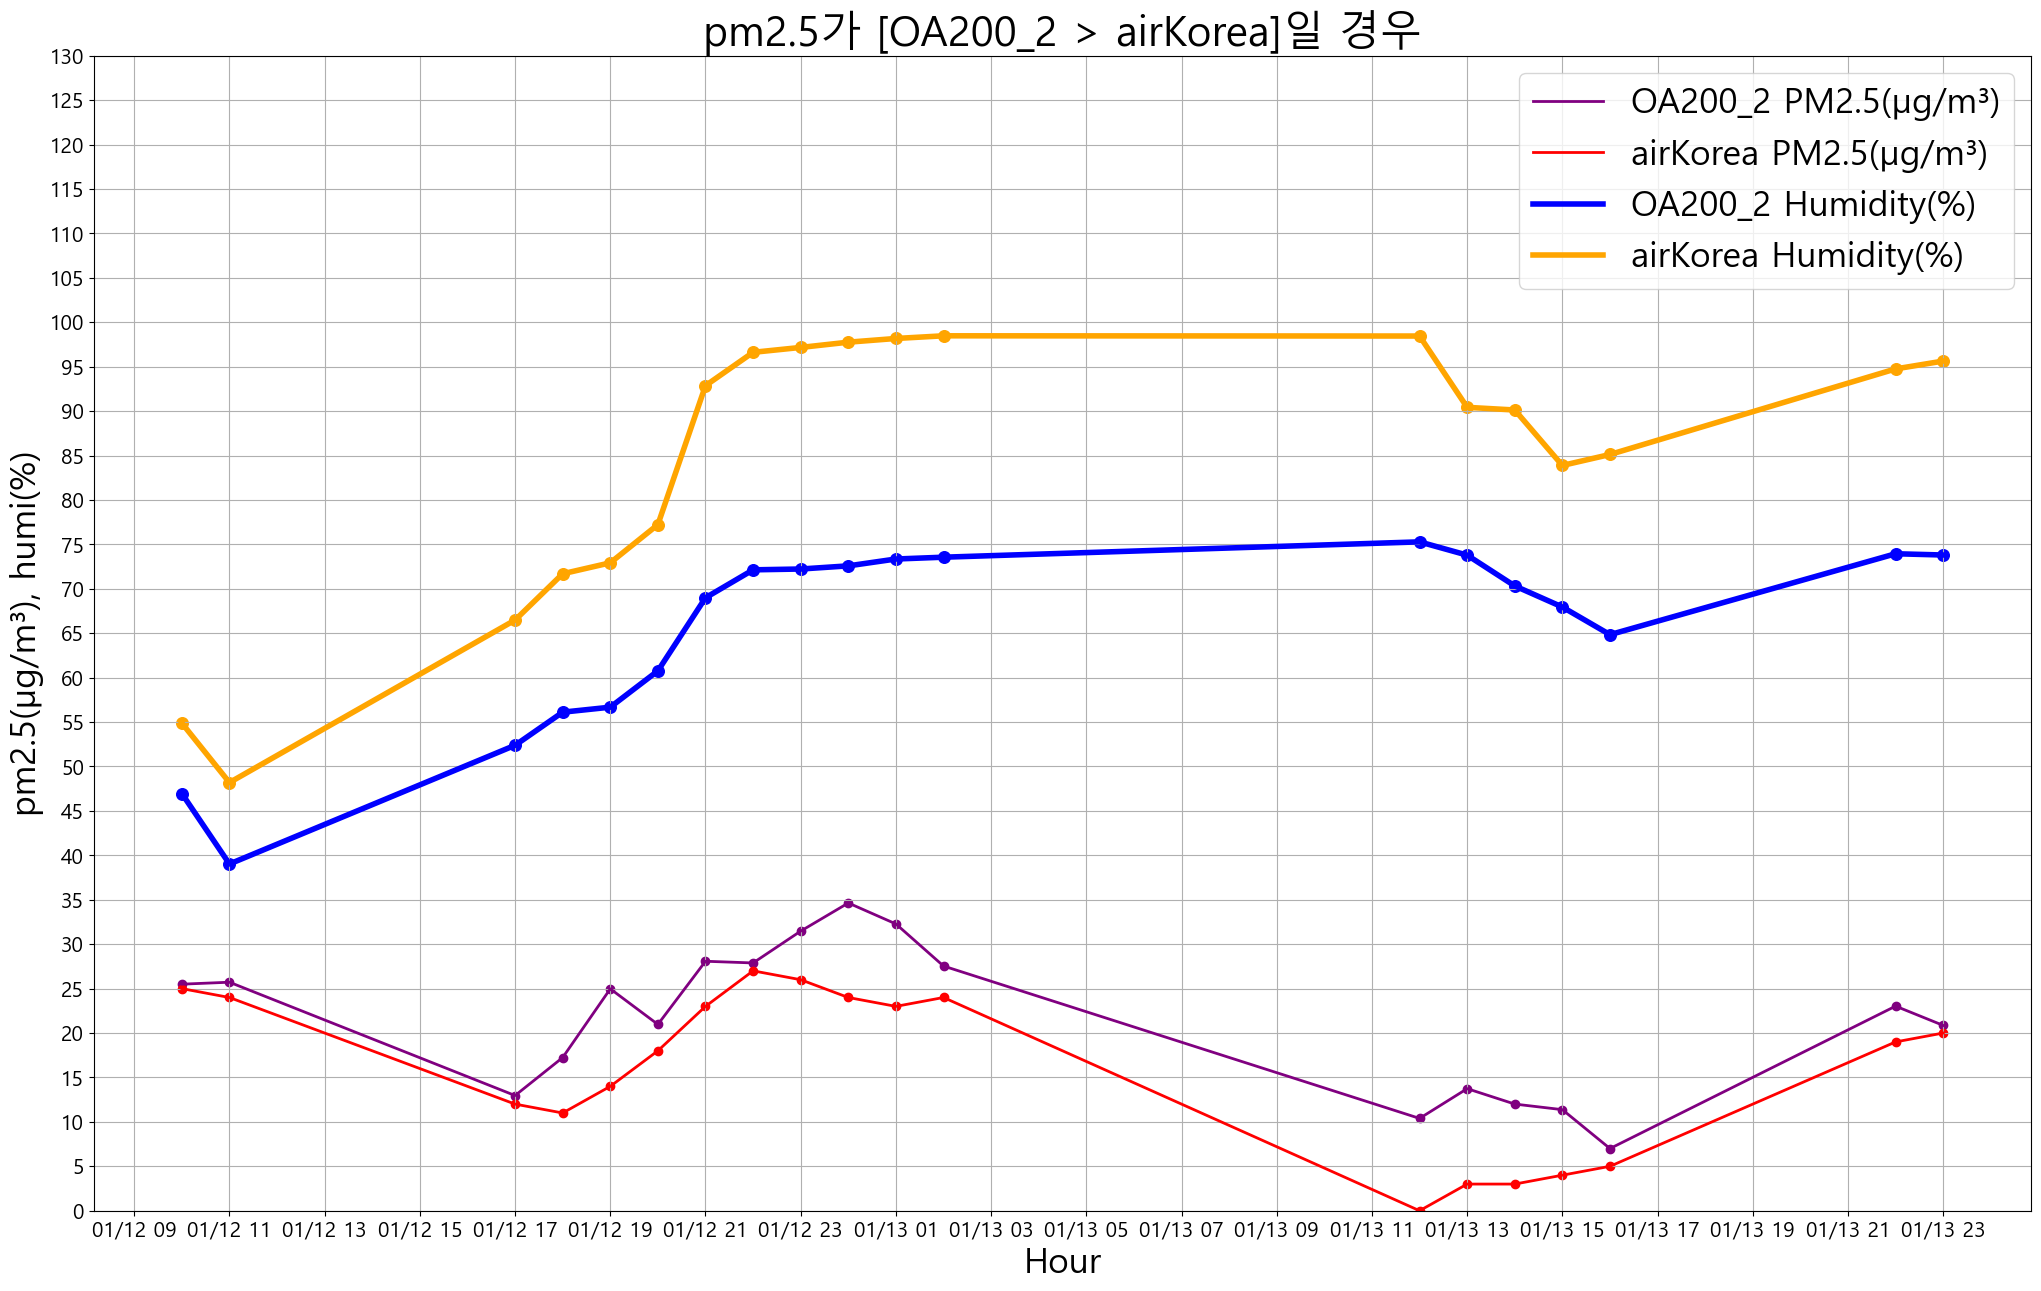

In [99]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_01.01~01.15.csv')
arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data_2 = pd.read_csv('./OA200_1/OA2001_01.16~01.31.csv')
arim_data_2['reg_date'] = arim_data_2.reg_date.apply(pd.to_datetime)
# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_01.01~01.15.csv')
airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_2 = pd.read_csv('./AirKorea_상봉동/AirKorea_01.16~01.31.csv')
airKorea_data_2['date'] = airKorea_data_2.date.apply(pd.to_datetime)

arim_data = pd.concat([arim_data, arim_data_2])
airKorea_data = pd.concat([airKorea_data, airKorea_data_2])

# 이름 설정
arim_data.name = '진주성'
airKorea_data.name = '상봉동'

# outliar 제거
remove_out(arim_data, airKorea_data, remove_col=['pm25'])

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

# arim 데이터 풍향, 풍속 데이터 삽입
Sangbong = pd.read_csv("./weather/상봉동/2023-01.csv", encoding='cp949')
Sangbong['일시'] = Sangbong['일시'].apply(pd.to_datetime)
Sangbong_avg = Sangbong.groupby([pd.Grouper(key='일시', freq='H')]).mean()
arim_data_avg['wind_dir'] = Sangbong_avg['풍향(16방위)']
arim_data_avg['wind_speed'] = Sangbong_avg['풍속(m/s)']
airKorea_data_avg['temp'] = Sangbong_avg['기온']
airKorea_data_avg['humi'] = Sangbong_avg['상대습도(%)']
airKorea_data_avg['wind_dir'] = Sangbong_avg['풍향(16방위)']
airKorea_data_avg['wind_speed'] = Sangbong_avg['풍속(m/s)']

arim_data_avg.drop('2023-02-01', axis=0, inplace=True)
arim_data_avg.drop('no', axis=1, inplace=True)

arim_data_avg = arim_data_avg.loc['2023-01-12 01:00:00':'2023-01-14 00:00:00']
airKorea_data_avg = airKorea_data_avg.loc['2023-01-12 01:00:00':'2023-01-14 00:00:00']

airKorea_data_avg.dropna(subset=['pm25'], axis=0)

idx = set(airKorea_data_avg.index).intersection(
    set(arim_data_avg.index)
)
airKorea_data_avg = airKorea_data_avg.reindex(idx)
arim_data_avg = arim_data_avg.reindex(idx)

diff = np.subtract(arim_data_avg.pm25, airKorea_data_avg.pm25)
diff = diff.to_frame(name='difference')
arimUp = arim_data_avg.loc[diff.loc[diff['difference']>0].index]
airKorea = airKorea_data_avg.loc[diff.loc[diff['difference']>0].index]
arimUp.sort_index(inplace=True)
airKorea.sort_index(inplace=True)

plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H'))
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=30))
plt.plot(arimUp.index, arimUp.pm25, color='purple', linewidth=2, label='OA200_2 PM2.5(µg/m³)')
plt.plot(airKorea.index, airKorea.pm25, color='red', linewidth=2, label='airKorea PM2.5(µg/m³)')
plt.plot(arimUp.index, arimUp.humi, color='blue', linewidth=4, label='OA200_2 Humidity(%)')
plt.plot(airKorea.index, airKorea.humi, color='orange', linewidth=4, label='airKorea Humidity(%)')
plt.scatter(arimUp.index, arimUp.pm25, color='purple')
plt.scatter(arimUp.index, arimUp.humi, color='blue', s=70)
plt.scatter(airKorea.index, airKorea.pm25, color='red')
plt.scatter(airKorea.index, airKorea.humi, color='orange', s=70)

plt.xlabel('Hour')
plt.ylabel('pm2.5(µg/m³), humi(%)')
plt.legend()
plt.title('pm2.5가 [OA200_2 > airKorea]일 경우')
plt.ylim(0,130)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.show()

진주성 : [Int64Index([], dtype='int64'), Int64Index([], dtype='int64')] 

상봉동 : [Int64Index([], dtype='int64'), Int64Index([], dtype='int64')] 



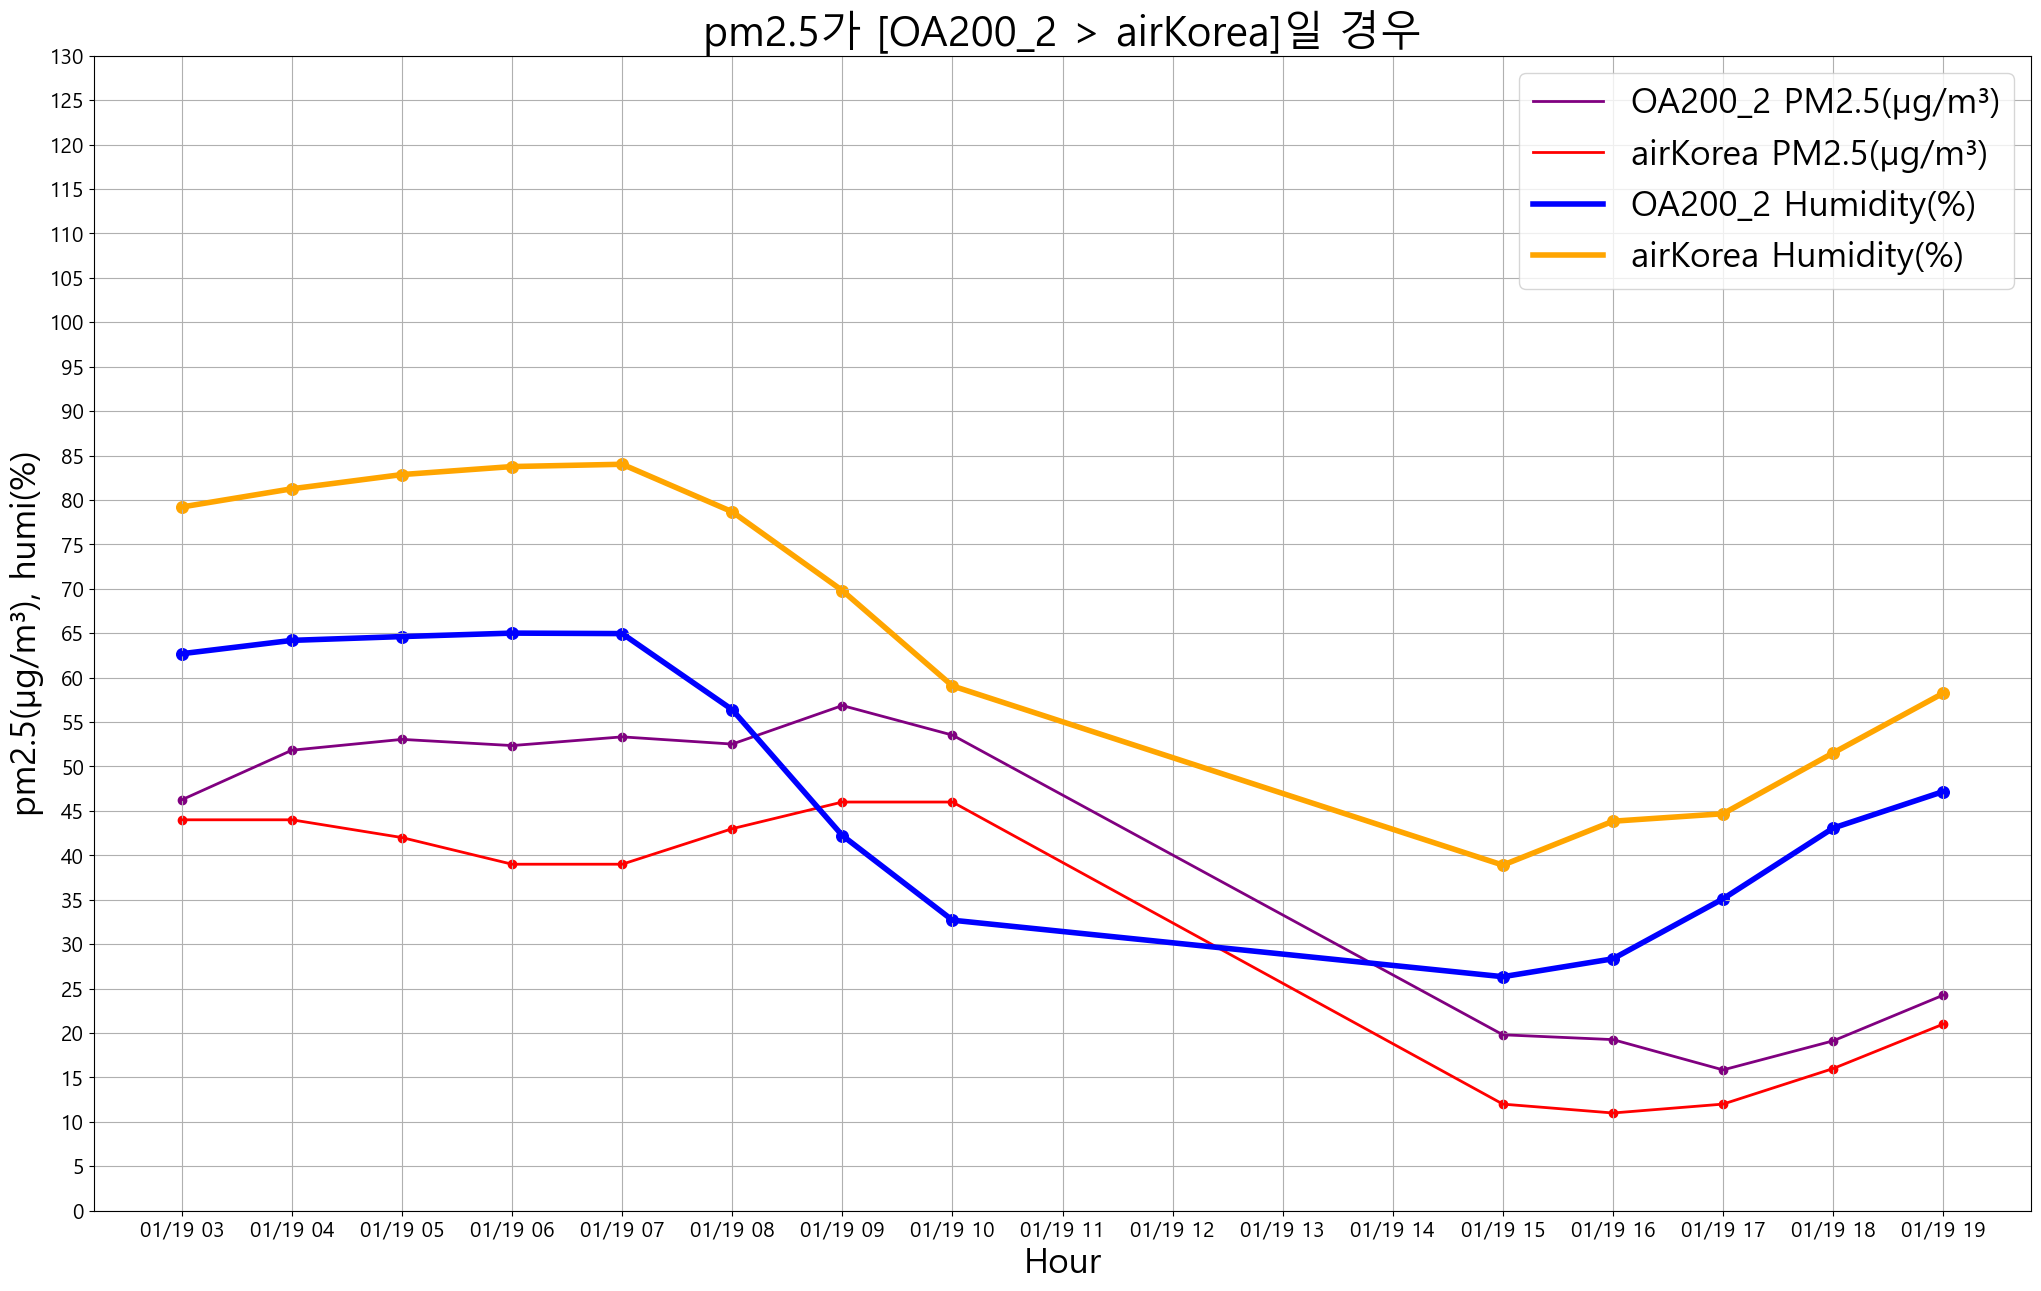

In [100]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_01.01~01.15.csv')
arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data_2 = pd.read_csv('./OA200_1/OA2001_01.16~01.31.csv')
arim_data_2['reg_date'] = arim_data_2.reg_date.apply(pd.to_datetime)
# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_01.01~01.15.csv')
airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_2 = pd.read_csv('./AirKorea_상봉동/AirKorea_01.16~01.31.csv')
airKorea_data_2['date'] = airKorea_data_2.date.apply(pd.to_datetime)

arim_data = pd.concat([arim_data, arim_data_2])
airKorea_data = pd.concat([airKorea_data, airKorea_data_2])

# 이름 설정
arim_data.name = '진주성'
airKorea_data.name = '상봉동'

# outliar 제거
remove_out(arim_data, airKorea_data, remove_col=['pm25'])

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

# arim 데이터 풍향, 풍속 데이터 삽입
Sangbong = pd.read_csv("./weather/상봉동/2023-01.csv", encoding='cp949')
Sangbong['일시'] = Sangbong['일시'].apply(pd.to_datetime)
Sangbong_avg = Sangbong.groupby([pd.Grouper(key='일시', freq='H')]).mean()
arim_data_avg['wind_dir'] = Sangbong_avg['풍향(16방위)']
arim_data_avg['wind_speed'] = Sangbong_avg['풍속(m/s)']
airKorea_data_avg['temp'] = Sangbong_avg['기온']
airKorea_data_avg['humi'] = Sangbong_avg['상대습도(%)']
airKorea_data_avg['wind_dir'] = Sangbong_avg['풍향(16방위)']
airKorea_data_avg['wind_speed'] = Sangbong_avg['풍속(m/s)']

arim_data_avg.drop('2023-02-01', axis=0, inplace=True)
arim_data_avg.drop('no', axis=1, inplace=True)

arim_data_avg = arim_data_avg.loc['2023-01-19 01:00:00':'2023-01-20 00:00:00']
airKorea_data_avg = airKorea_data_avg.loc['2023-01-19 01:00:00':'2023-01-20 00:00:00']

airKorea_data_avg.dropna(subset=['pm25'], axis=0)

idx = set(airKorea_data_avg.index).intersection(
    set(arim_data_avg.index)
)
airKorea_data_avg = airKorea_data_avg.reindex(idx)
arim_data_avg = arim_data_avg.reindex(idx)

diff = np.subtract(arim_data_avg.pm25, airKorea_data_avg.pm25)
diff = diff.to_frame(name='difference')
arimUp = arim_data_avg.loc[diff.loc[diff['difference']>0].index]
airKorea = airKorea_data_avg.loc[diff.loc[diff['difference']>0].index]
arimUp.sort_index(inplace=True)
airKorea.sort_index(inplace=True)

plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H'))
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=30))
plt.plot(arimUp.index, arimUp.pm25, color='purple', linewidth=2, label='OA200_2 PM2.5(µg/m³)')
plt.plot(airKorea.index, airKorea.pm25, color='red', linewidth=2, label='airKorea PM2.5(µg/m³)')
plt.plot(arimUp.index, arimUp.humi, color='blue', linewidth=4, label='OA200_2 Humidity(%)')
plt.plot(airKorea.index, airKorea.humi, color='orange', linewidth=4, label='airKorea Humidity(%)')
plt.scatter(arimUp.index, arimUp.pm25, color='purple')
plt.scatter(arimUp.index, arimUp.humi, color='blue', s=70)
plt.scatter(airKorea.index, airKorea.pm25, color='red')
plt.scatter(airKorea.index, airKorea.humi, color='orange', s=70)

plt.xlabel('Hour')
plt.ylabel('pm2.5(µg/m³), humi(%)')
plt.legend()
plt.title('pm2.5가 [OA200_2 > airKorea]일 경우')
plt.ylim(0,130)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.show()

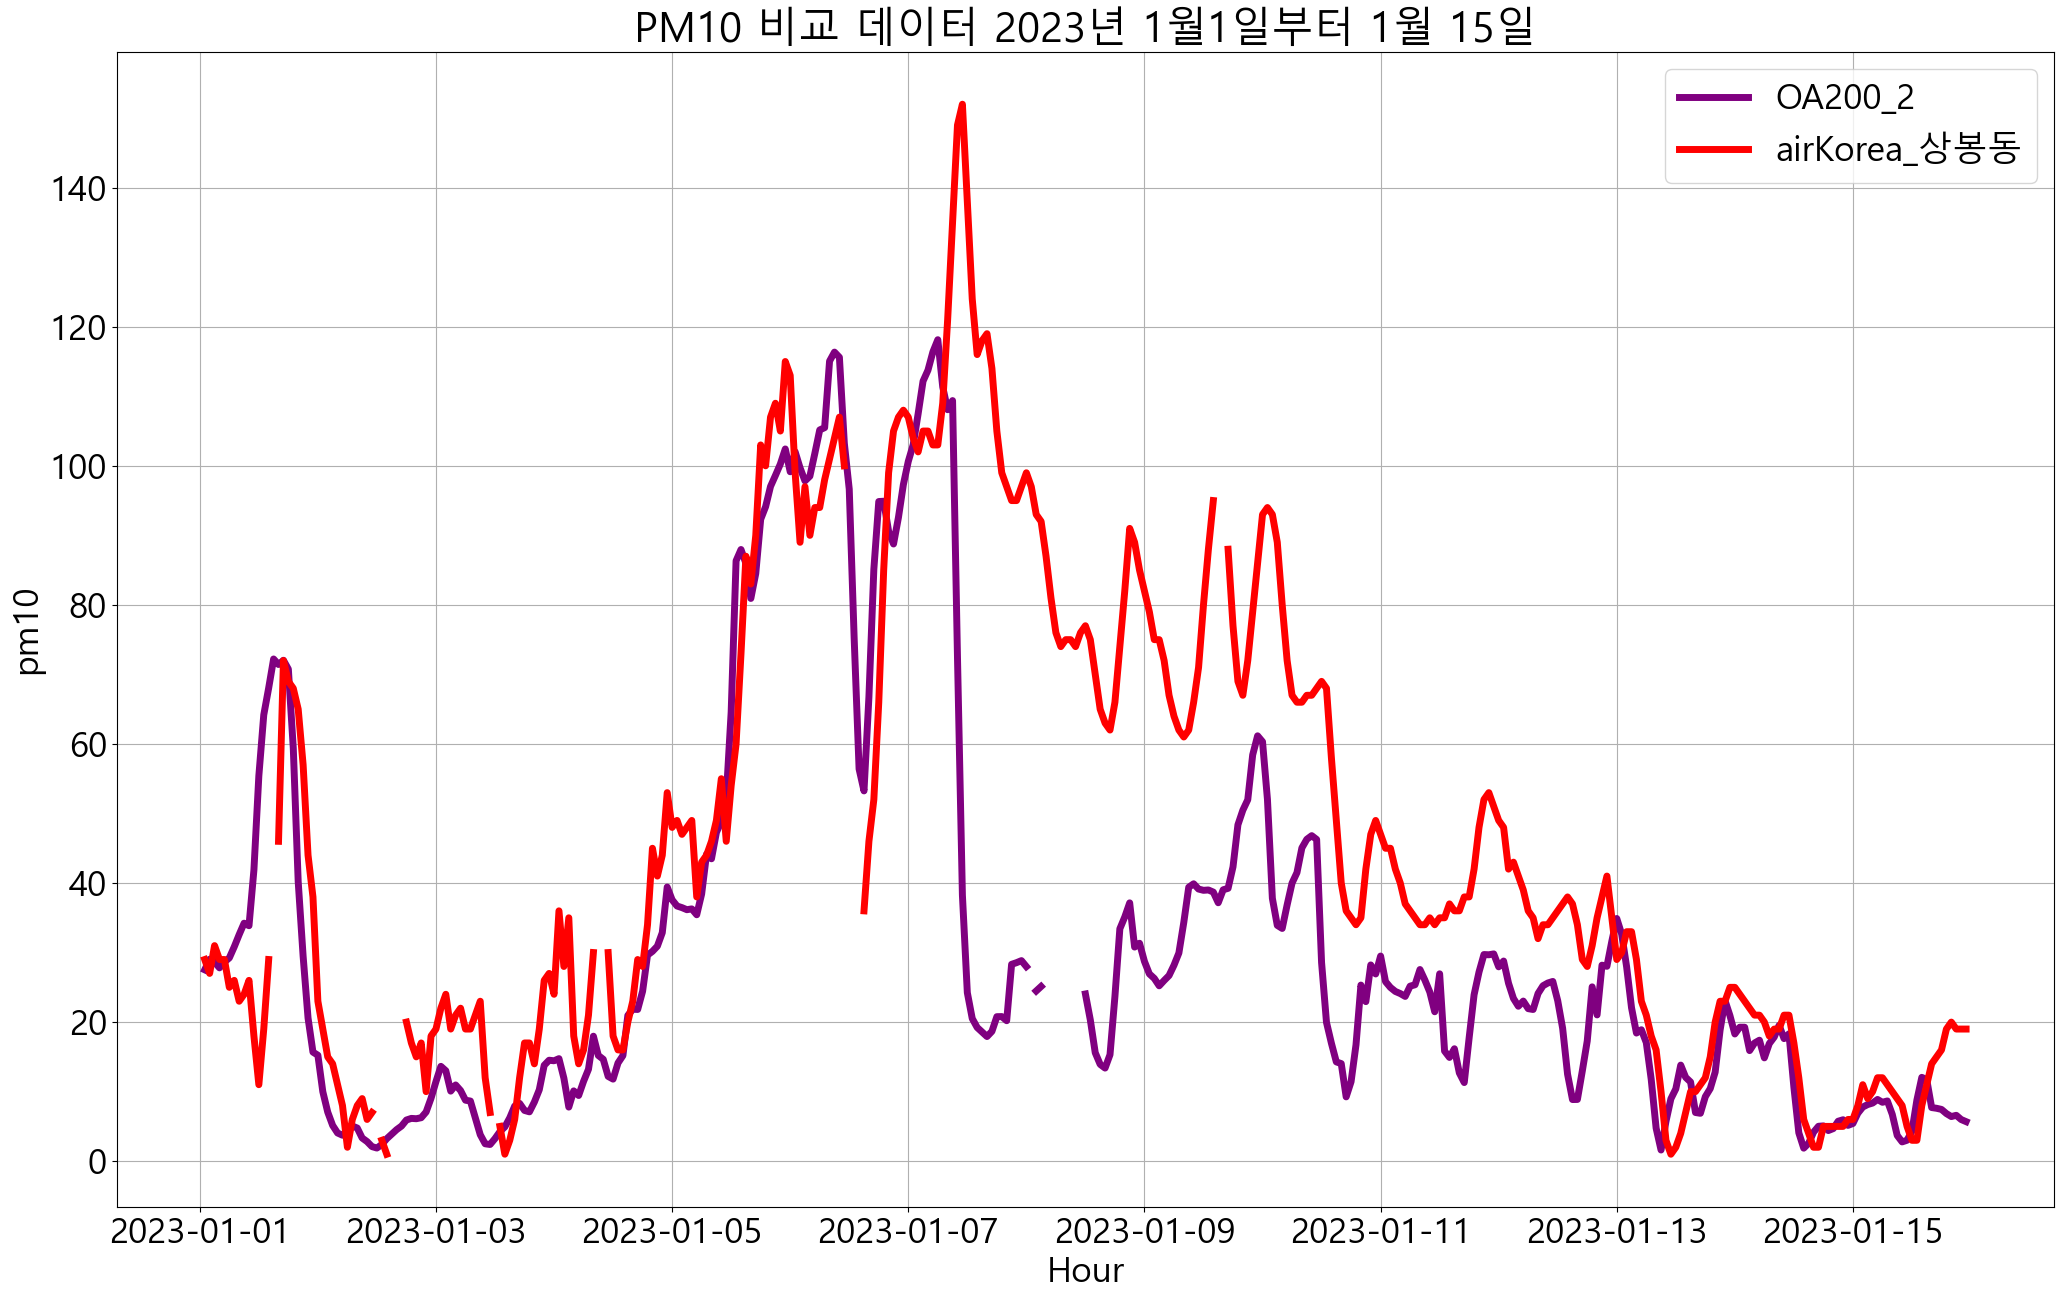

In [14]:
# 그래프 2개 비교
plt.plot(arim_data_avg.index, arim_data_avg.pm10, color="purple", linewidth="5")
plt.plot(airKorea_data_avg.index, airKorea_data_avg.pm10, color="red", linewidth="5")
plt.xlabel('Hour')
plt.ylabel('pm10')
plt.legend(('OA200_2','airKorea_상봉동'))
plt.title('PM10 비교 데이터 2023년 1월1일부터 1월 15일')
plt.grid()
plt.show()

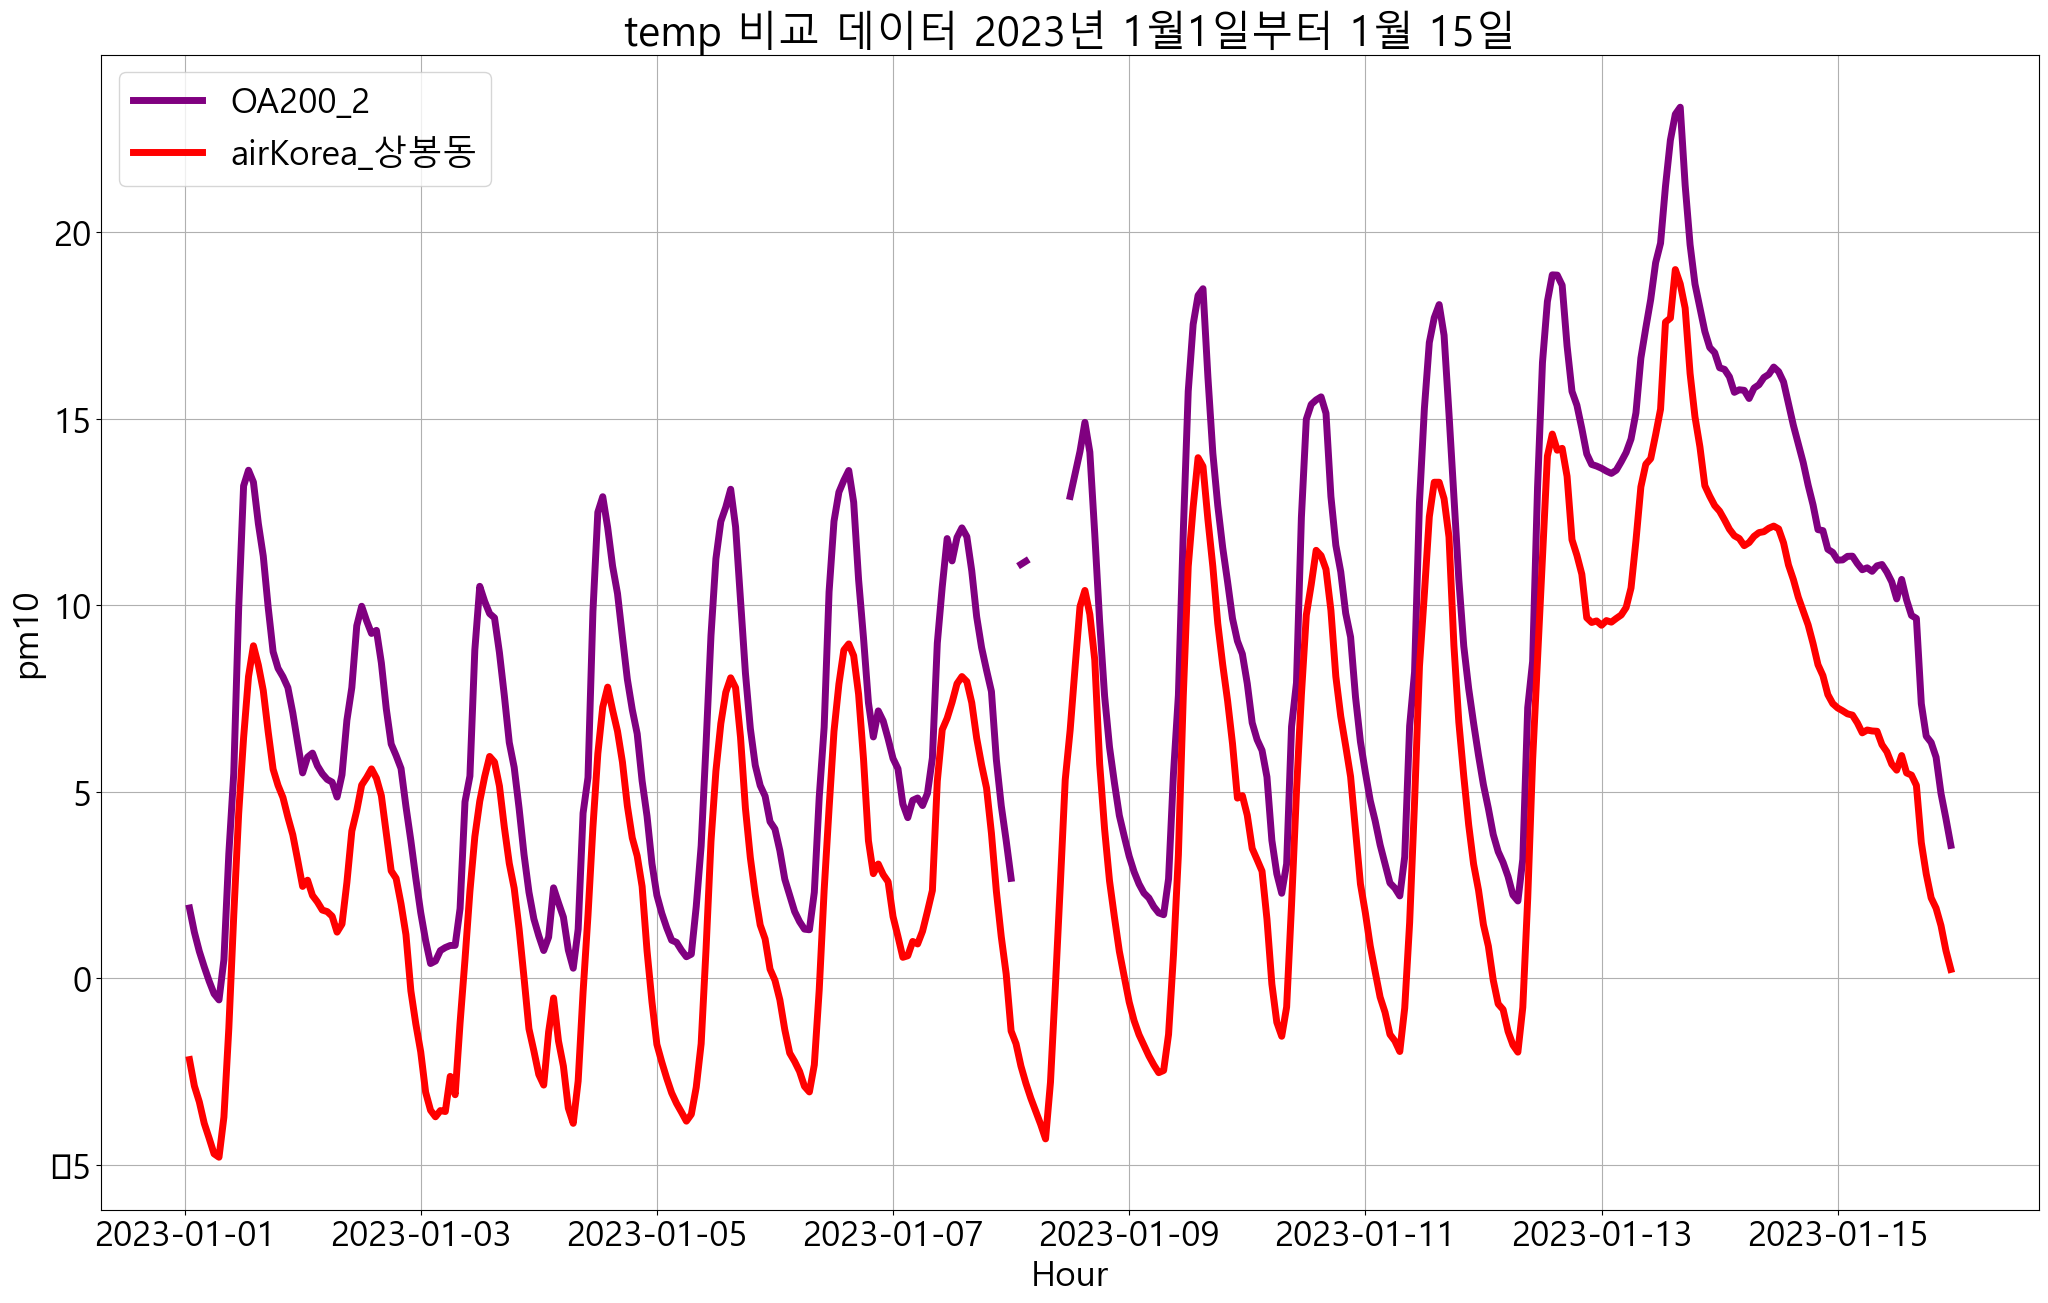

In [15]:
# 그래프 2개 비교
plt.plot(arim_data_avg.index, arim_data_avg.temp, color="purple", linewidth="5")
plt.plot(airKorea_data_avg.index, airKorea_data_avg.temp, color="red", linewidth="5")
plt.xlabel('Hour')
plt.ylabel('pm10')
plt.legend(('OA200_2','airKorea_상봉동'))
plt.title('temp 비교 데이터 2023년 1월1일부터 1월 15일')
plt.grid()
plt.show()

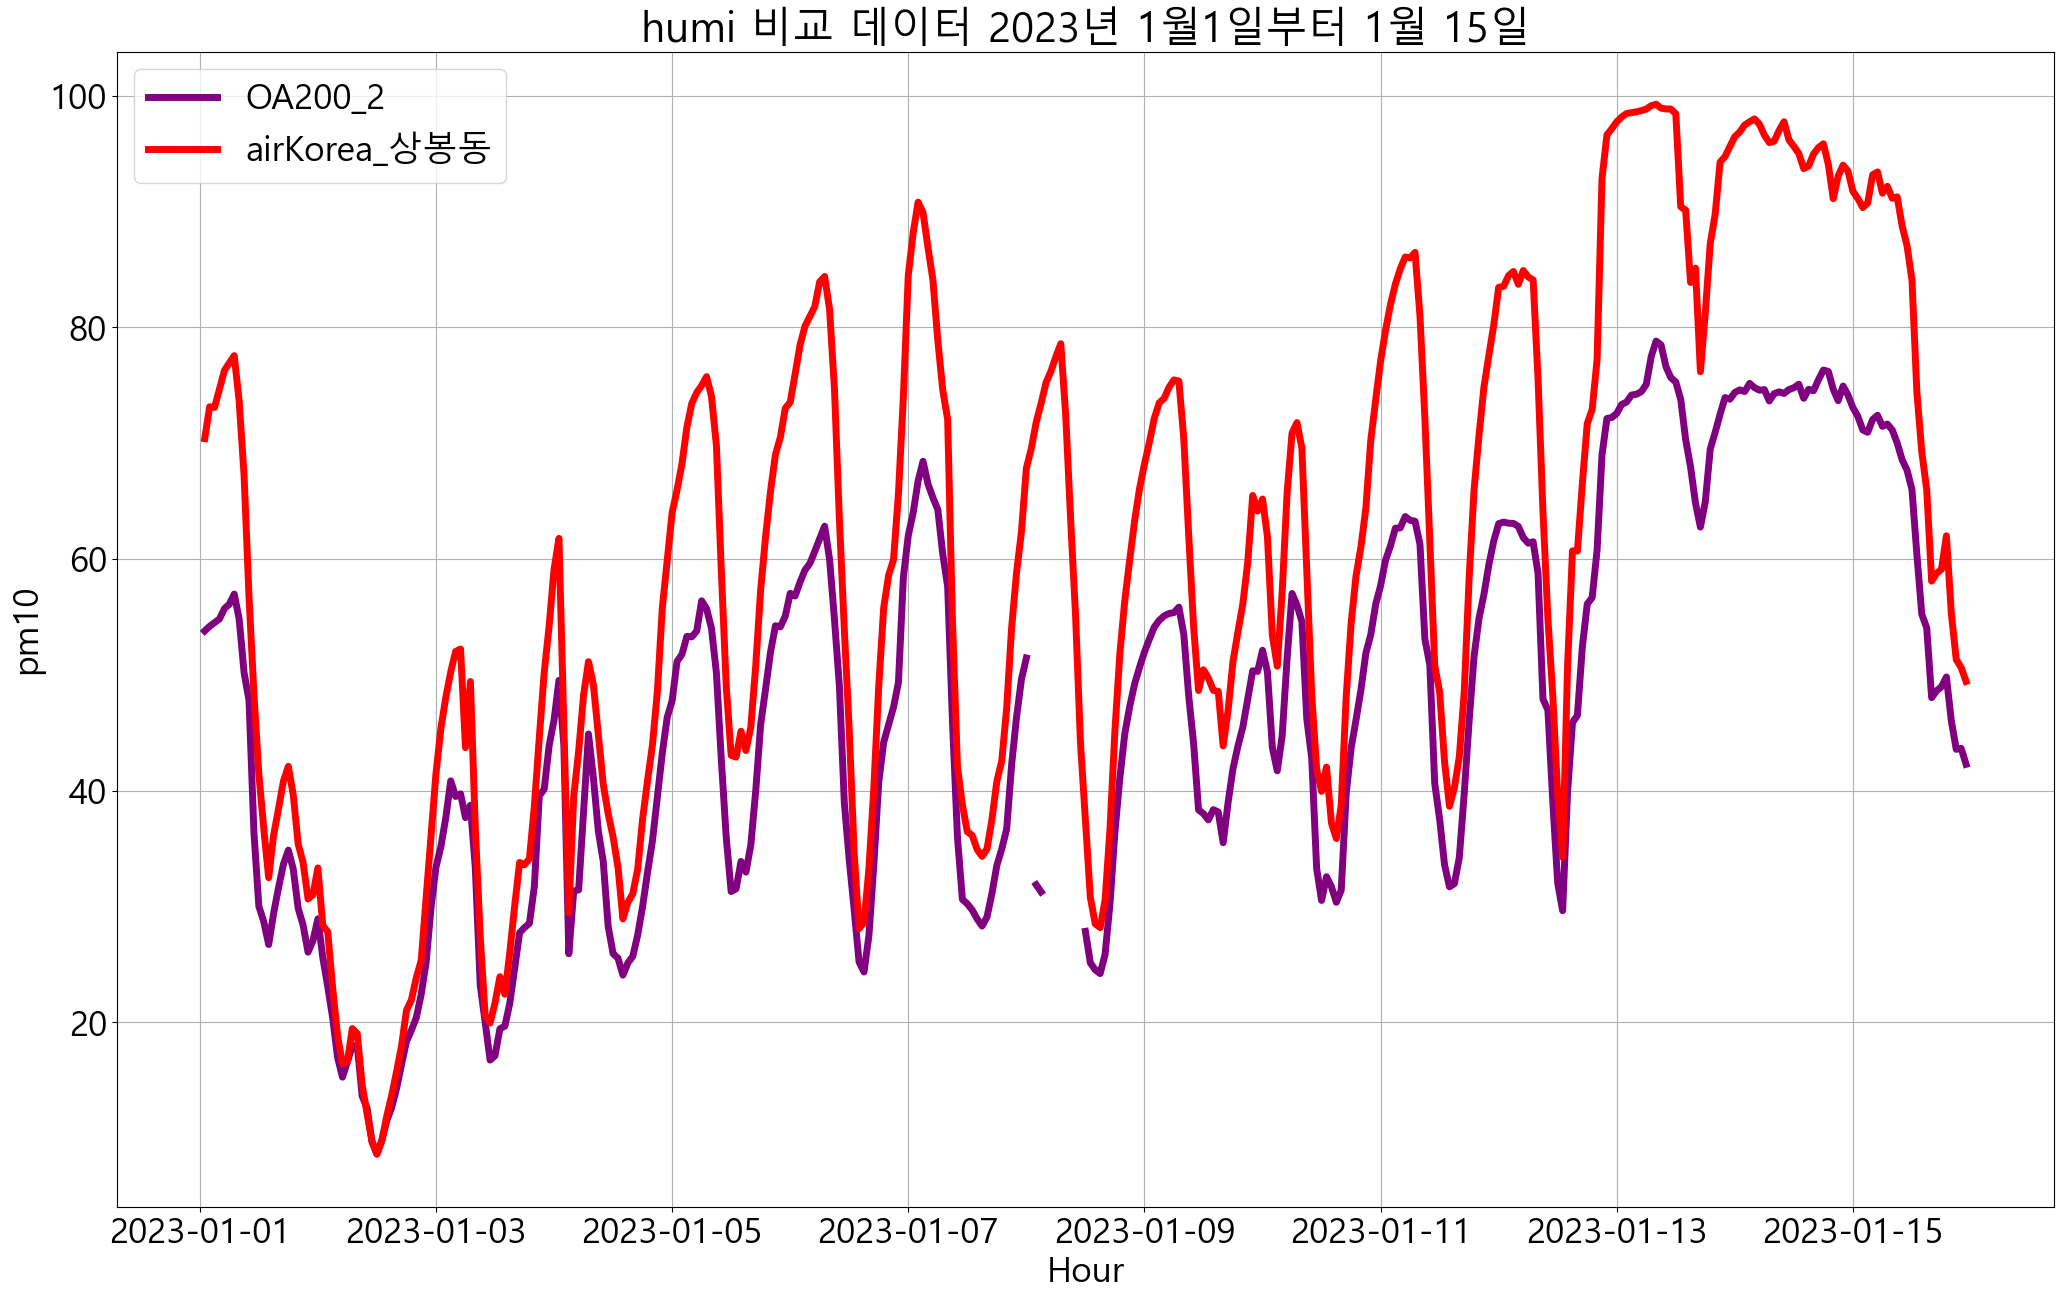

In [16]:
# 그래프 2개 비교
plt.plot(arim_data_avg.index, arim_data_avg.humi, color="purple", linewidth="5")
plt.plot(airKorea_data_avg.index, airKorea_data_avg.humi, color="red", linewidth="5")
plt.xlabel('Hour')
plt.ylabel('pm10')
plt.legend(('OA200_2','airKorea_상봉동'))
plt.title('humi 비교 데이터 2023년 1월1일부터 1월 15일')
plt.grid()
plt.show()